## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Import Data
http://ai.stanford.edu/~amaas/data/sentiment/

In [2]:
df = pd.read_csv('moviereviews.csv')
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [3]:
len(df)

2000

## Clean Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2000 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [5]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [6]:
## Dropping all NaN Columns
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1965 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 46.1+ KB


In [7]:
## Number of Empty Strings in Reviews
len(df[df['review'].str.strip()==''])

27

In [8]:
## Dropping all rows with empty strings
df = df[df['review'].str.strip()!='']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


## CountPlot

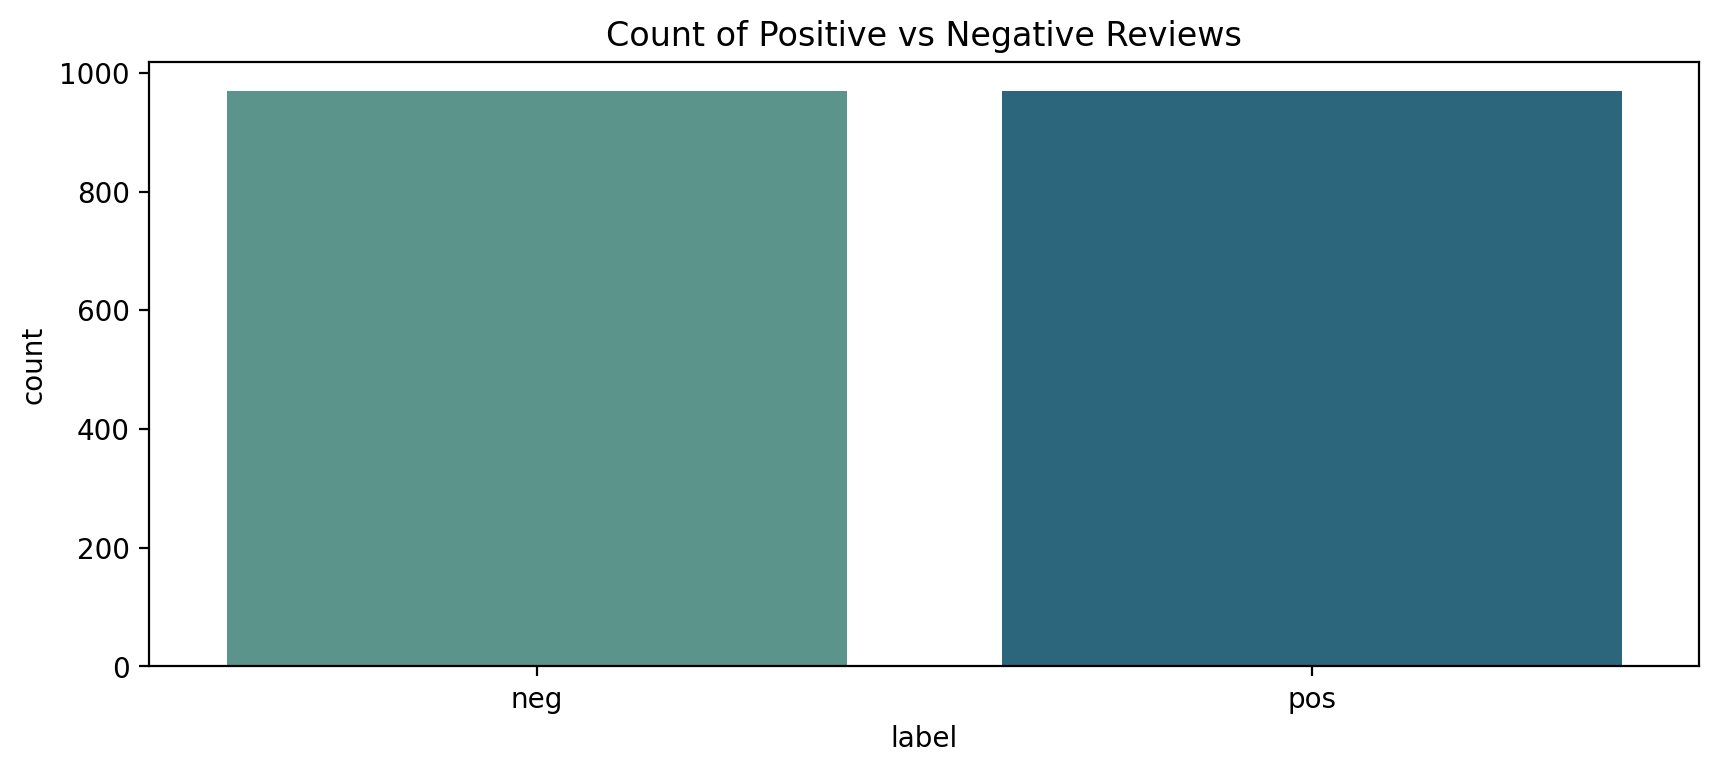

In [10]:
plt.figure(figsize=(10,4), dpi=200)
sns.countplot(x='label', data=df, palette='crest')
plt.title('Count of Positive vs Negative Reviews');

## EDA Bag of Words
- finding the top 20 words that show up over and over again per label type

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

In [12]:
cv = CountVectorizer(stop_words='english')
sparse_pos = cv.fit_transform(df[df['label']=='pos']['review'])

In [13]:
## Top 20 Words for Positive Reviews
freqs = zip(cv.get_feature_names(), sparse_pos.sum(axis=0).tolist()[0])  
print(sorted(freqs, key=lambda x: -x[1])[:20])

[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


In [14]:
cv = CountVectorizer(stop_words='english')
sparse_neg = cv.fit_transform(df[df['label']=='neg']['review'])

In [15]:
## Top 20 words for Negative Reviews
freqs = zip(cv.get_feature_names(), sparse_neg.sum(axis=0).tolist()[0])  
print(sorted(freqs, key=lambda x: -x[1])[:20])

[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


# Natural Language Processing (Supervised)

## Separate into Feature and Label

In [16]:
X = df['review']
y = df['label']

## Train | Test Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Count Vectorization & TF-IDF

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
tf_idf = TfidfVectorizer(stop_words='english')
tf_idf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [21]:
X_train_tfidf = tf_idf.transform(X_train)
X_test_tfidf = tf_idf.transform(X_test)

## Building Different Models

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

### SVC

In [23]:
svc = SVC()

In [24]:
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','poly','rbf'], 'degree':[2,3,4,5]}

In [25]:
svc_model = GridSearchCV(svc,param_grid, cv=5, scoring='accuracy')

In [26]:
svc_model.fit(X_train_tfidf,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'degree': [2, 3, 4, 5],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [27]:
svc_model.best_estimator_.get_params()

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 2,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### MultinomialNB

In [28]:
multi_nb = MultinomialNB()

In [29]:
param_grid = {'alpha':[0.01,0.1,1,1.5,2], 'fit_prior':[True,False]}

In [30]:
multi_nb_model = GridSearchCV(multi_nb,param_grid, cv=5, scoring='accuracy')

In [31]:
multi_nb_model.fit(X_train_tfidf,y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 1, 1.5, 2],
                         'fit_prior': [True, False]},
             scoring='accuracy')

In [32]:
multi_nb_model.best_estimator_.get_params()

{'alpha': 1, 'class_prior': None, 'fit_prior': True}

### LogisticRegression

In [33]:
log = LogisticRegression()

In [34]:
l1_ratio = np.linspace(0,1,20)
C = np.logspace(0,10,20)
param_grid = {'penalty':['l1','l2','elasticnet'], 'l1_ratio': l1_ratio, 'C':C}

In [35]:
log_model = GridSearchCV(log,param_grid,cv=5,scoring='accuracy')

In [36]:
## Errors are for elastic net, l1 and l2 dont use l1_ratio, ignore errors
log_model.fit(X_train_tfidf,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [37]:
log_model.best_estimator_.get_params()

{'C': 428.1332398719391,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': 0.0,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### KNN

In [38]:
knn = KNeighborsClassifier()

In [39]:
k_values = list(range(1,50))
param_grid = {'n_neighbors':k_values, 'weights':['uniform','distance'], 'metric':['euclidean','minkowski']}

In [40]:
knn_model = GridSearchCV(knn, param_grid,cv=5,scoring='accuracy')

In [41]:
knn_model.fit(X_train_tfidf,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [42]:
knn_model.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 42,
 'p': 2,
 'weights': 'distance'}

## Performance Metrics

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, plot_roc_curve

### Helper Function

In [44]:
def report(model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test_tfidf,y_test)
    print('\nAccuracy Score')
    print(accuracy_score(y_test,preds))
    
    print('\nROC Curve')
    fig,ax = plt.subplots(figsize=(12,8), dpi=200)
    plot_roc_curve(model,X_test_tfidf,y_test, ax=ax)

### SVC Performance

              precision    recall  f1-score   support

         neg       0.80      0.83      0.81       191
         pos       0.83      0.80      0.81       197

    accuracy                           0.81       388
   macro avg       0.81      0.81      0.81       388
weighted avg       0.81      0.81      0.81       388


Accuracy Score
0.8144329896907216

ROC Curve


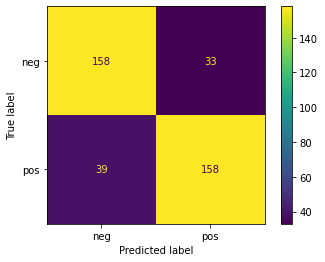

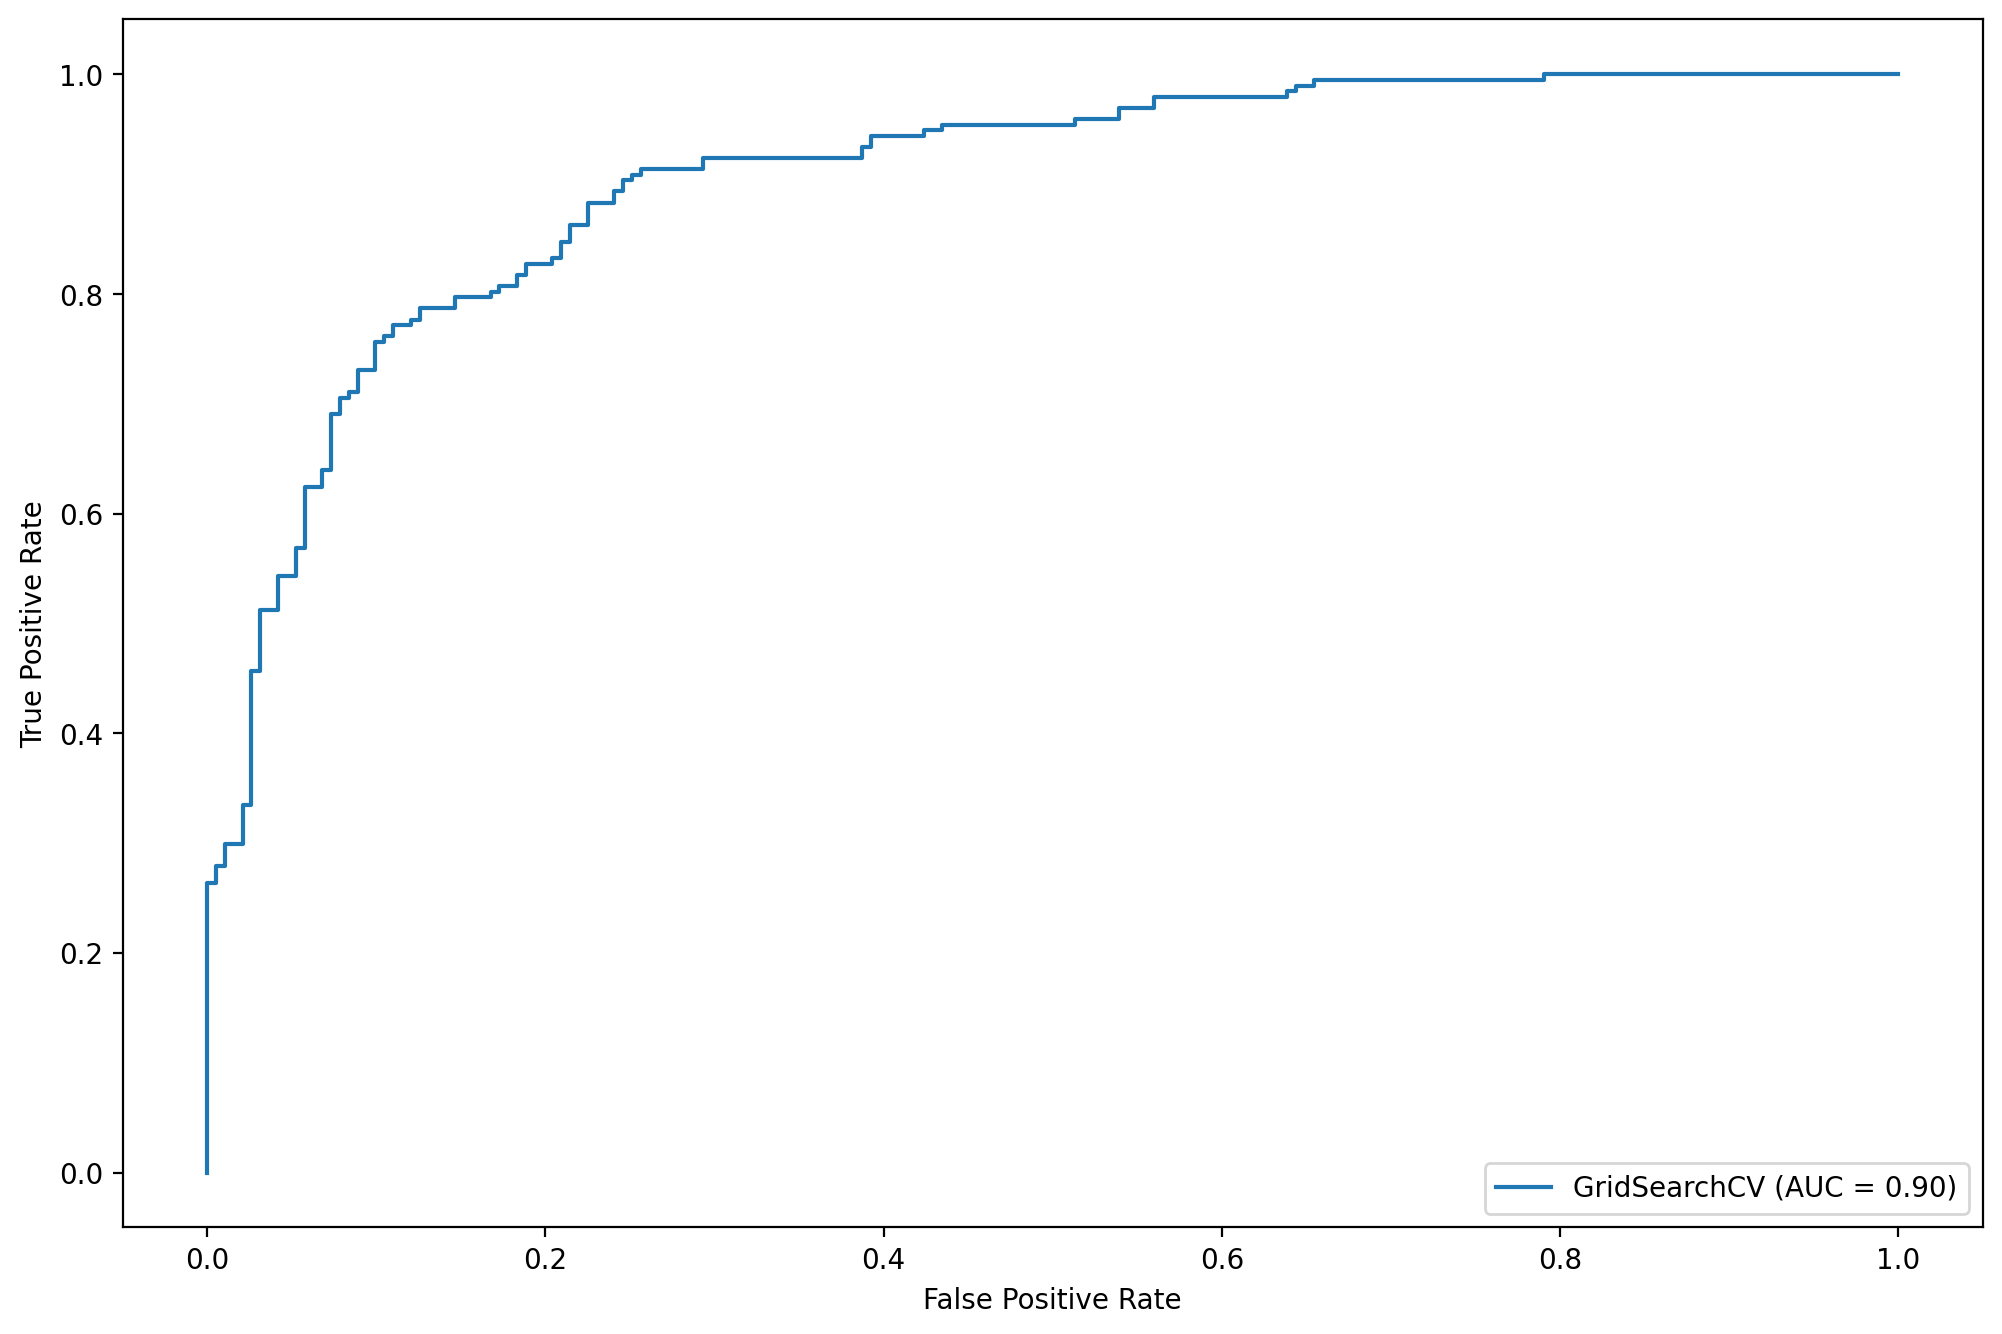

In [45]:
report(svc_model)

### Logistic Regression Performance

              precision    recall  f1-score   support

         neg       0.82      0.84      0.83       191
         pos       0.84      0.82      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388


Accuracy Score
0.8298969072164949

ROC Curve


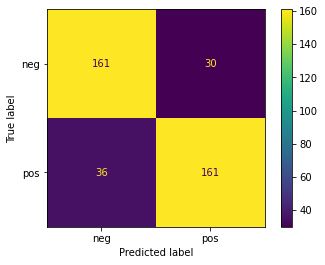

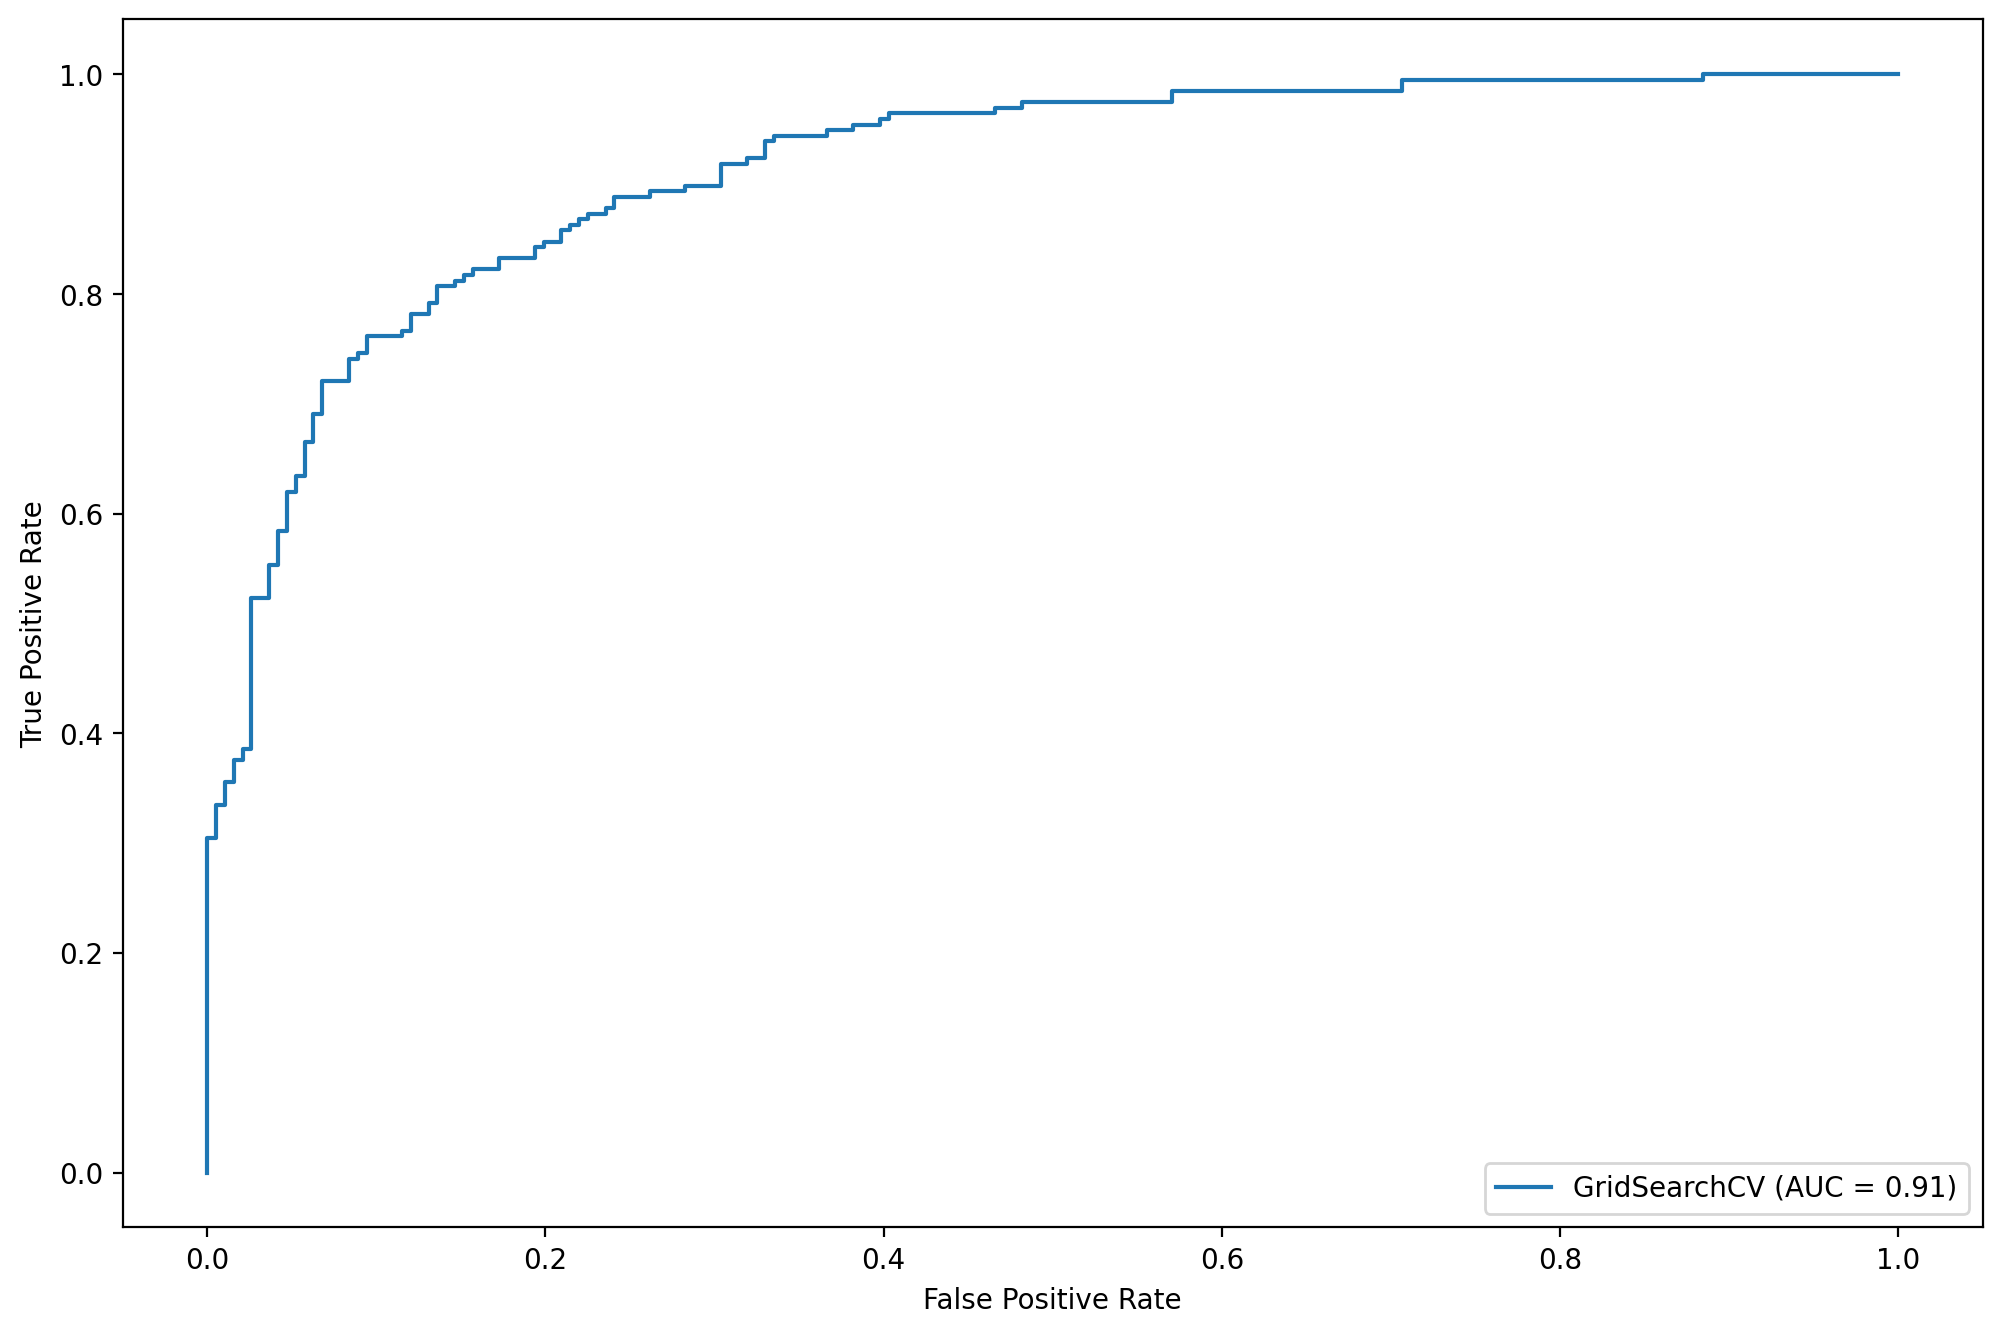

In [46]:
report(log_model)

### KNN Performance

              precision    recall  f1-score   support

         neg       0.71      0.79      0.75       191
         pos       0.77      0.69      0.73       197

    accuracy                           0.74       388
   macro avg       0.74      0.74      0.74       388
weighted avg       0.74      0.74      0.74       388


Accuracy Score
0.7371134020618557

ROC Curve


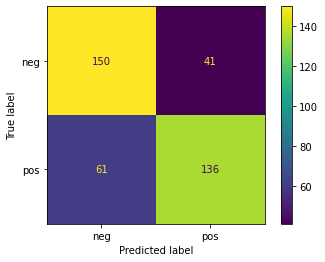

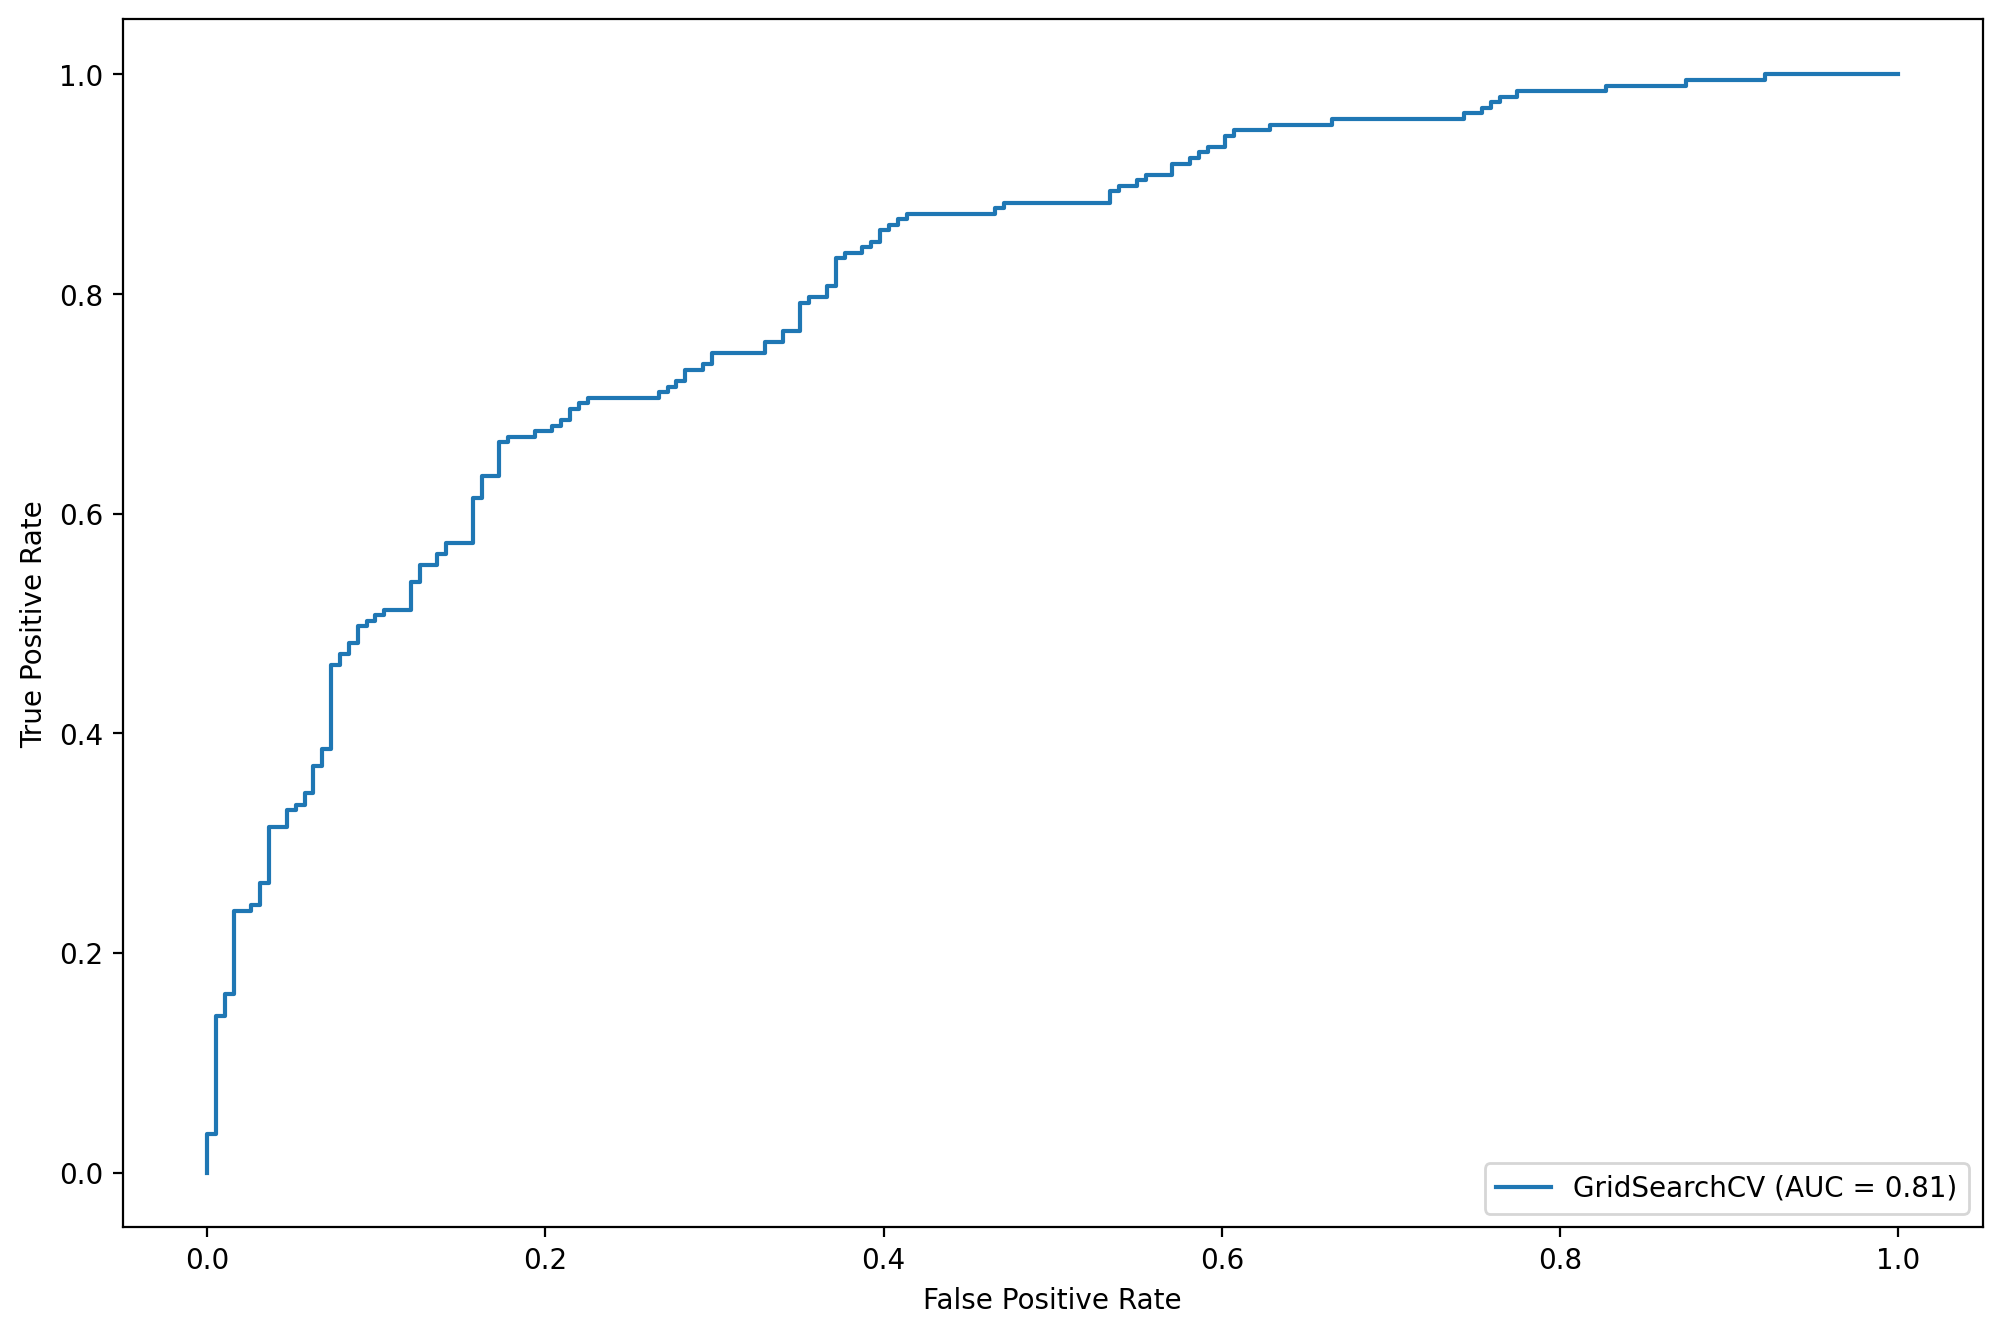

In [47]:
report(knn_model)

## Final Model
Based on the results, we see that the log model performed best.

In [48]:
from sklearn.pipeline import Pipeline

In [49]:
final_model = Pipeline([('tfidf', TfidfVectorizer()),('logistic', LogisticRegression(C= 428.1332398719391, penalty = 'l2',max_iter=1000))])

In [50]:
final_model.fit(X,y)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('logistic',
                 LogisticRegression(C=428.1332398719391, max_iter=1000))])

In [51]:
final_model.predict(['Waste of time.'])

array(['neg'], dtype=object)